## Flow Path Information

| Basin Area (mi<sup>2</sup>) | Basin Area (ac) |
| --- | --- |
| 0.00703125 | 4.50 |


| Flow Path | Length |
| --- | --- |
| 1 | 286.7 |
| 2 | 627.5 |
| 3 | 747.3 |
| 4 | 845.3 |
| 5 | 452.7 |



In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

concentrations = pd.read_excel("Travel Times.xlsx", sheet_name=[0, 1, 2])

In [11]:
year2 = [concentrations[0]['t1'][0], concentrations[0]['t2'][0], concentrations[0]['t3'][0], concentrations[0]['t4'][0], concentrations[0]['t5'][0]]
year10 = [concentrations[1]['t1'][0], concentrations[1]['t2'][0], concentrations[1]['t3'][0], concentrations[1]['t4'][0], concentrations[1]['t5'][0]]
year100 = [concentrations[2]['t1'][0], concentrations[2]['t2'][0], concentrations[2]['t3'][0], concentrations[2]['t4'][0], concentrations[2]['t5'][0]]

In [12]:
#Time of concentrations
toc2 = max(year2)
toc10 = max(year10)
toc100 = max(year100)

In [13]:
#tl
tl2 = 0.6 * toc2
tl10 = 0.6 * toc10
tl100 = 0.6 * toc100

#tr and area in sq. mi.
tr = 0.1
a = 0.00703125

In [14]:
#tp
tp2 = (tr/2) + tl2
tp10 = (tr/2) + tl10
tp100 = (tr/2) + tl100

In [15]:
qup2 = 484 * a/tp2
qup10 = 484 * a/tp10
qup100 = 484 * a/tp100

## Runoff Hydrographs

In [16]:
data = pd.read_excel("Travel Times.xlsx", sheet_name=3)
dataAll = pd.DataFrame(data)

times = dataAll['t']
ququp = dataAll['qu/qup'][dataAll['qu/qup'].notna()]
qu2 = qup2 * ququp
qu10 = qup10 * ququp
qu100 = qup100 * ququp

effective2 = dataAll['year2'][dataAll['year2'].notna()]
effective10 = dataAll['year10'][dataAll['year10'].notna()]
effective100 = dataAll['year100'][dataAll['year100'].notna()]


discharge2 = []
for val in effective2:
    discharge2.append(qu2 * val)  
    
discharge10 = []
for val in effective10:
    discharge10.append(qu10 * val)   

discharge100 = []
for val in effective100:
    discharge100.append(qu100 * val)   
    
discharge2 = pd.DataFrame(discharge2)   
discharge2 = discharge2.values.tolist()

discharge10 = pd.DataFrame(discharge10)   
discharge10 = discharge10.values.tolist()

discharge100 = pd.DataFrame(discharge100)   
discharge100 = discharge100.values.tolist()


In [17]:
sum2 = 1500 * [0]
for index, col in enumerate(discharge2):
    offset = round(index/10, 1)
    #print('the offset is', offset) #this value is where the runoff begins
    for timeIndex, val in enumerate(times):
        if round(val, 1) == offset:
            start = timeIndex
            #print('this one starts adding at ', start)           
               
    for step, q in enumerate(col):
        #print(sum2[start + step] + q, 'was added at ', start + step)
        sum2[start + step] = sum2[start + step] + q
        #print('done with row', index)
    
    #print('time ', timeIndex+step, 'is ', sum[timeIndex+step])         
sum2 = sum2[0:len(times)]  

sum10 = 1500 * [0]
for index, col in enumerate(discharge10):
    offset = round(index/10, 1)
    #print('the offset is', offset) #this value is where the runoff begins
    for timeIndex, val in enumerate(times):
        if round(val, 1) == offset:
            start = timeIndex
            #print('this one starts adding at ', start)           
               
    for step, q in enumerate(col):
        #print(sum10[start + step] + q, 'was added at ', start + step)
        sum10[start + step] = sum10[start + step] + q
        #print('done with row', index)
    
    #print('time ', timeIndex+step, 'is ', sum[timeIndex+step])         
sum10 = sum10[0:len(times)] 

sum100 = 1500 * [0]
for index, col in enumerate(discharge100):
    offset = round(index/10, 1)
    #print('the offset is', offset) #this value is where the runoff begins
    for timeIndex, val in enumerate(times):
        if round(val, 1) == offset:
            start = timeIndex
            #print('this one starts adding at ', start)           
               
    for step, q in enumerate(col):
        #print(sum100[start + step] + q, 'was added at ', start + step)
        sum100[start + step] = sum100[start + step] + q
        #print('done with row', index)
    
    #print('time ', timeIndex+step, 'is ', sum[timeIndex+step])
            
sum100 = sum100[0:len(times)] 

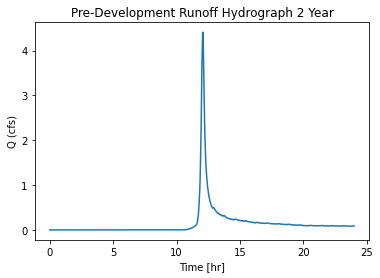

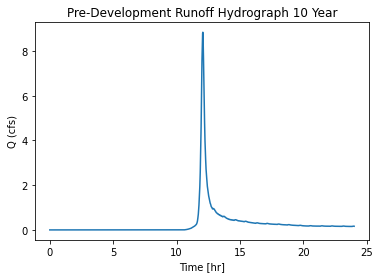

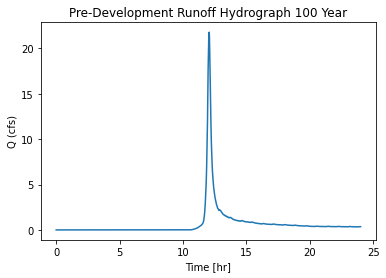

In [18]:
plt.figure();
plt.plot(times, sum2)
plt.title('Pre-Development Runoff Hydrograph 2 Year');
plt.xlabel('Time [hr]');
plt.ylabel("Q (cfs)");

plt.figure();
plt.plot(times, sum10)
plt.title('Pre-Development Runoff Hydrograph 10 Year');
plt.xlabel('Time [hr]');
plt.ylabel("Q (cfs)");


plt.figure();
plt.plot(times, sum100)
plt.title('Pre-Development Runoff Hydrograph 100 Year');
plt.xlabel('Time [hr]');
plt.ylabel("Q (cfs)");